# Importation des librairies

In [1]:
import numpy as np
import pandas as pd

import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 16

# Importation du jeu de données

In [2]:
VinRouge = pd.read_csv('winequality-red.csv')
VinRouge.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Appréhension du jeu de données

In [3]:
VinRouge.shape

(1599, 12)

In [4]:
VinRouge.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
VinRouge.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
VinRouge.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
VinRouge.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Distribution du jeu de données

In [8]:
Asymetrie = VinRouge.skew()
Asymetrie

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

### Visualisation de la distribution

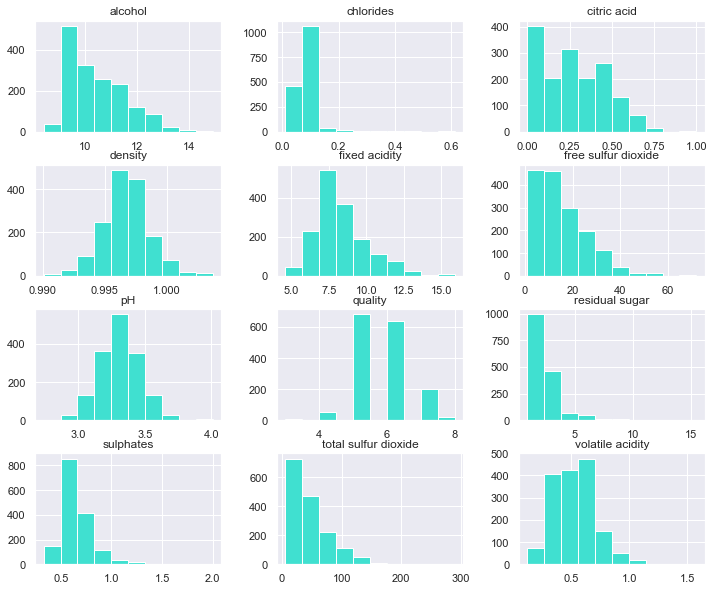

In [9]:
sns.set()
VinRouge.hist(figsize=(12,10), color='turquoise')
plt.show()

In [10]:
# La qualité est exprimée en variables continues et non pas en tant que valeurs discrètes. 
# La plupart des vins sont notés «5» et/ou «6».

# Quelle est la corrélation entre le jeu de données et essayer de comprendre la perspicacité

# Corrélation

In [11]:
VinRouge_correlation = VinRouge.corr()
VinRouge_correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [12]:
VinRouge_correlation.sort_values(by=['quality'],inplace=True)
VinRouge_correlation['quality']

# à partir de cette corrélation, il est clair que la qualité évolue en fonction des autres caractéristiques
# L’alcool a la plus forte corrélation avec la qualité du vin, suivi de l'acide volatile, des sulfates, de l’acide citrique et du sulfure de dioxide.

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

### Visualisation de la corrélation

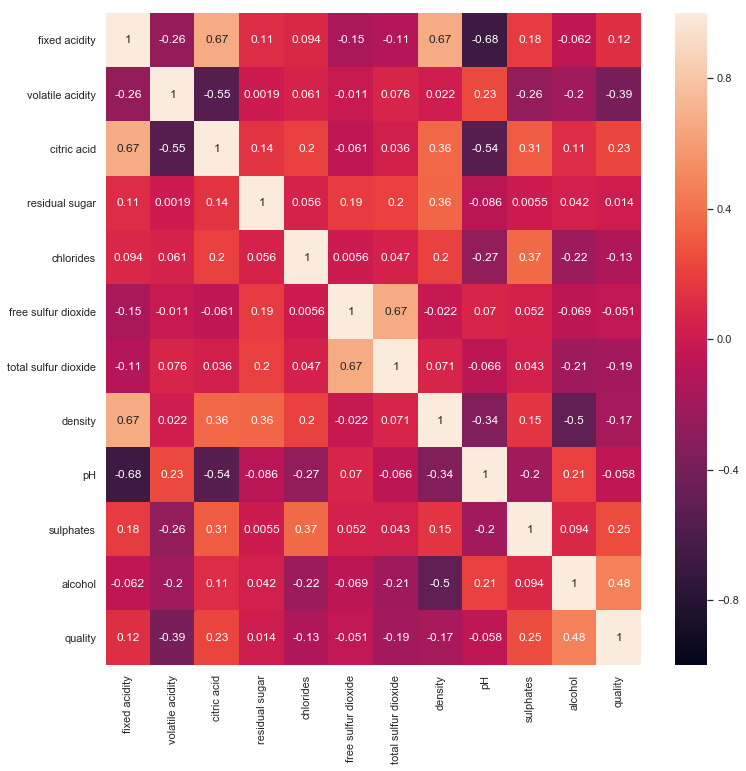

In [13]:
Tableau_Correlation = plt.cm.viridis
plt.figure(figsize=(12,12))
sns.heatmap(VinRouge.corr(),vmin=-1, vmax=1,annot=True)

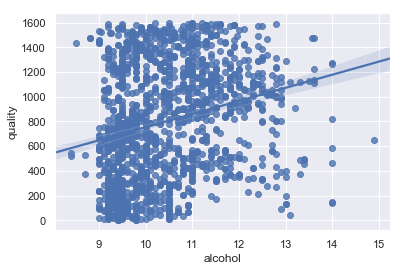

In [80]:
sns.regplot(x="alcohol", y="quality", data=VinRouge)

plt.show()


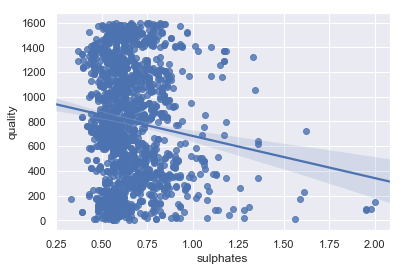

In [81]:
sns.regplot(x="sulphates", y="quality", data=VinRouge)
plt.show()

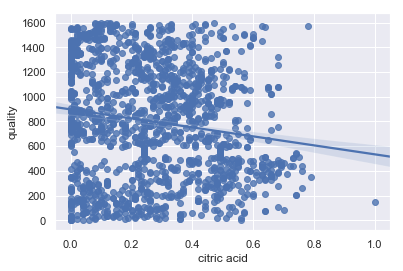

In [82]:
sns.regplot(x="citric acid", y="quality", data=VinRouge)
plt.show()

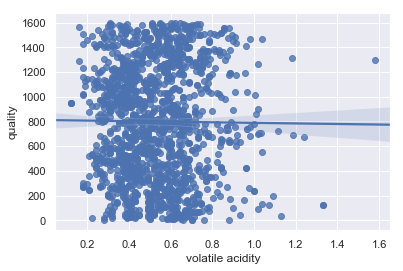

In [83]:
sns.regplot(x="volatile acidity", y="quality", data=VinRouge)
plt.show()

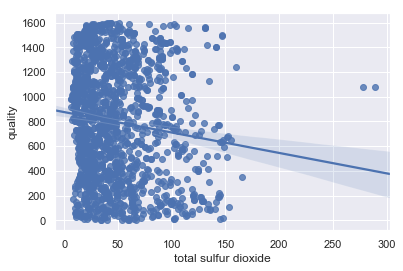

In [84]:
sns.regplot(x="total sulfur dioxide", y="quality", data=VinRouge)
plt.show()

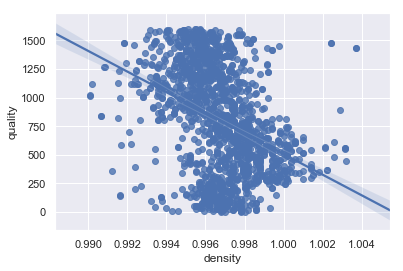

In [85]:
sns.regplot(x="density", y="quality", data=VinRouge)
plt.show()

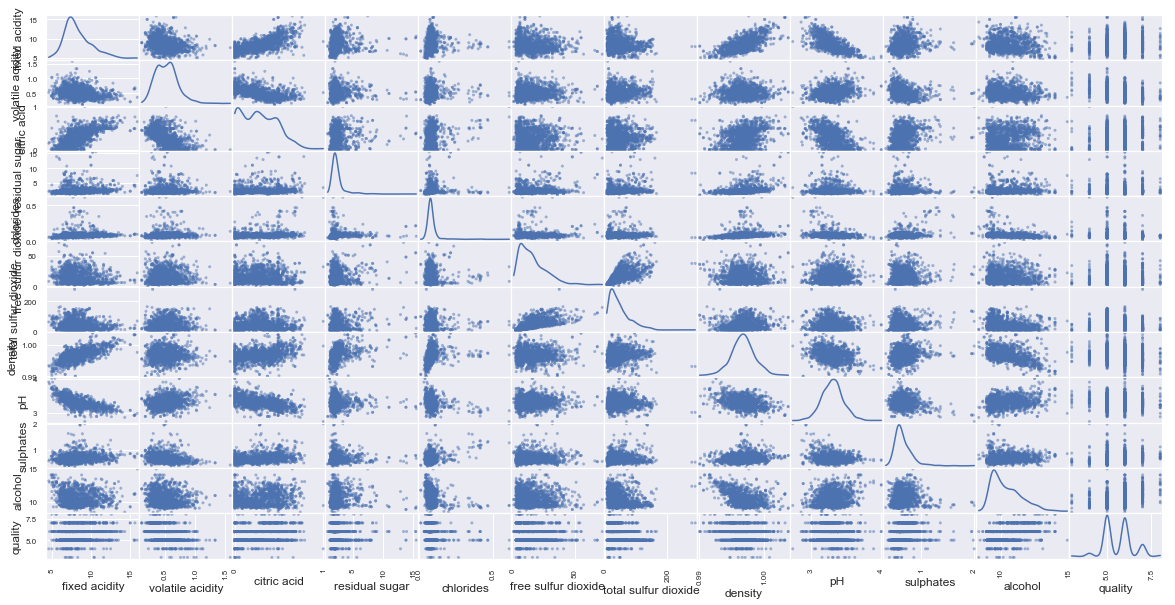

In [8]:
from pandas.plotting import scatter_matrix

scatter_matrix(VinRouge, alpha=0.5, figsize=(20, 10), diagonal='kde')
plt.show()
# On constate donc que mis à part la densité aucune valeur n'induit la qualité du vin rouge.
# On doit donc à présent utiliser des algorithmes de classification non supervisé tels que la régression logistique, le KNN, ou bien le SVM, Naive Bayes, l'arbre de dcision, etc...

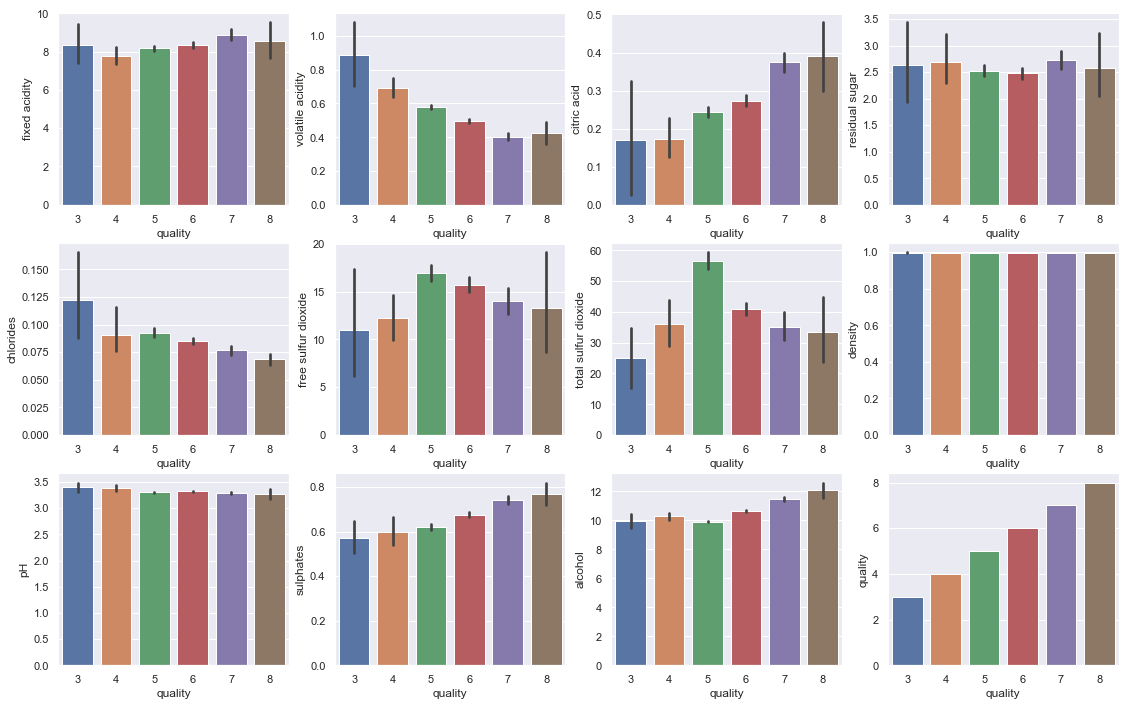

In [15]:
# Comparons à présent la colonne "Quality" avec les autres colonnes/paramètres

plt.figure(figsize=(19,12))
plt.subplot(4,3,1)
j=1
for i in VinRouge.columns:
    plt.subplot(3,4,j)
    sns.barplot(x='quality',y=i,data=VinRouge)
    j+=1

In [16]:
# par exemple, il ressort clairement ici qu’en augmentant la valeur de l’acide citrique, la qualité du vin s’améliore

# Qualité du vin rouge

In [17]:
VinRouge.quality.value_counts()

# On constate bien ici que nous avons peu de vin rouge de qualité inférieure à 3 et supérieure à 8. 
# La plupart des échantillons de vin ont une qualité attribuée à 5 ou 6.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Assembler la qualité en 3 groupes

In [18]:
noms_groupes = ['mauvais','moyen', 'bon']
VinRouge['groupe_qualite'] = pd.cut(VinRouge['quality'], bins = 3, labels = noms_groupes)
VinRouge['groupe_qualite'].value_counts()

moyen      1319
bon         217
mauvais      63
Name: groupe_qualite, dtype: int64

### Visualisation

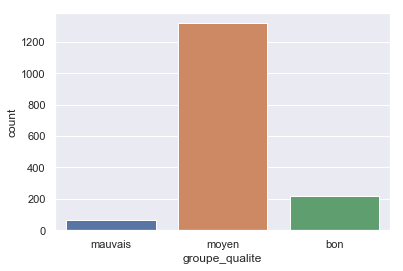

In [19]:
sns.countplot(VinRouge['groupe_qualite'])

# Analyse bivariée pour les entités hautement corrélées

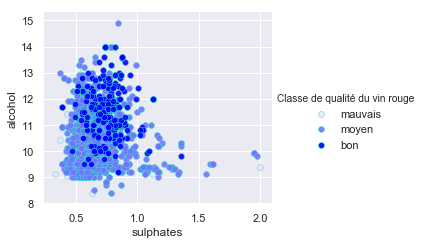

In [20]:
g = sns.FacetGrid(VinRouge, hue='groupe_qualite', hue_order=['mauvais','moyen', 'bon'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('blue', 3))
g.map(plt.scatter, 'sulphates', 'alcohol', alpha=0.9, edgecolor='turquoise', linewidth=0.5)
l = g.add_legend(title='Classe de qualité du vin rouge')

#nous pouvons constater que les échantillons de vin de qualité supérieure présentent des niveaux de sulfates et d'alcool plus hauts que ceux des échantillons de vins moyens ou faibles.

# Comprendre le jeu de données et ses caractéristiques en fonction des groupes de qualité

In [21]:
subset_attributes = VinRouge.columns
mauvais = VinRouge[VinRouge["groupe_qualite"] == "mauvais"][subset_attributes].describe()
moyen = VinRouge[VinRouge['groupe_qualite'] == 'moyen'][subset_attributes].describe()
bon = VinRouge[VinRouge['groupe_qualite'] == 'bon'][subset_attributes].describe()
pd.concat([mauvais, moyen, bon], axis=0, keys=['Vin rouge de mauvaise qualité', 'Vin rouge de qualité moyenne', 'Vin rouge de bonne qualité']).T

Vin rouge de mauvaise qualité                        \
                                             count       mean        std   
fixed acidity                                 63.0   7.871429   1.649284   
volatile acidity                              63.0   0.724206   0.247970   
citric acid                                   63.0   0.173651   0.207406   
residual sugar                                63.0   2.684921   1.723735   
chlorides                                     63.0   0.095730   0.075121   
free sulfur dioxide                           63.0  12.063492   9.076508   
total sulfur dioxide                          63.0  34.444444  26.395123   
density                                       63.0   0.996689   0.001667   
pH                                            63.0   3.384127   0.175100   
sulphates                                     63.0   0.592222   0.224323   
alcohol                                       63.0  10.215873   0.918178   
quality                                       63.0   3.841270   0.368359   

                                                                    \
                         min        25%      50%      75%      max   
fixed acidity         4.6000   6.800000   7.5000   8.4000   12.500   
volatile acidity      0.2300   0.565000   0.6800   0.8825    1.580   
citric acid           0.0000   0.020000   0.0800   0.2700    1.000   
residual sugar        1.2000   1.900000   2.1000   2.9500   12.900   
chlorides             0.0450   0.068500   0.0800   0.0945    0.610   
free sulfur dioxide   3.0000   5.000000   9.0000  15.5000   41.000   
total sulfur dioxide  7.0000  13.500000  26.0000  48.0000  119.000   
density               0.9934   0.995655   0.9966   0.9977    1.001   
pH                    2.7400   3.300000   3.3800   3.5000    3.900   
sulphates             0.3300   0.495000   0.5600   0.6000    2.000   
alcohol               8.4000   9.600000  10.0000  11.0000   13.100   
quality               3.0000   4.000000   4.0000   4.0000    4.000   

                     Vin rouge de qualité moyenne             ...           \
                                            count       mean  ...      75%   
fixed acidity                              1319.0   8.254284  ...   9.1000   
volatile acidity                           1319.0   0.538560  ...   0.6400   
citric acid                                1319.0   0.258264  ...   0.4000   
residual sugar                             1319.0   2.503867  ...   2.6000   
chlorides                                  1319.0   0.088973  ...   0.0910   
free sulfur dioxide                        1319.0  16.368461  ...  22.0000   
total sulfur dioxide                       1319.0  48.946929  ...  65.0000   
density                                    1319.0   0.996867  ...   0.9979   
pH                                         1319.0   3.311296  ...   3.4000   
sulphates                                  1319.0   0.647263  ...   0.7000   
alcohol                                    1319.0  10.252717  ...  10.9000   
quality                                    1319.0   5.483700  ...   6.0000   

                                Vin rouge de bonne qualité             \
                            max                      count       mean   
fixed acidity          15.90000                      217.0   8.847005   
volatile acidity        1.33000                      217.0   0.405530   
citric acid             0.79000                      217.0   0.376498   
residual sugar         15.50000                      217.0   2.708756   
chlorides               0.61100                      217.0   0.075912   
free sulfur dioxide    72.00000                      217.0  13.981567   
total sulfur dioxide  165.00000                      217.0  34.889401   
density                 1.00369                      217.0   0.996030   
pH                      4.01000                      217.0   3.288802   
sulphates               1.98000                      217.0   0.743456   
alcoho

### Visualisation du vin avec l'alcool

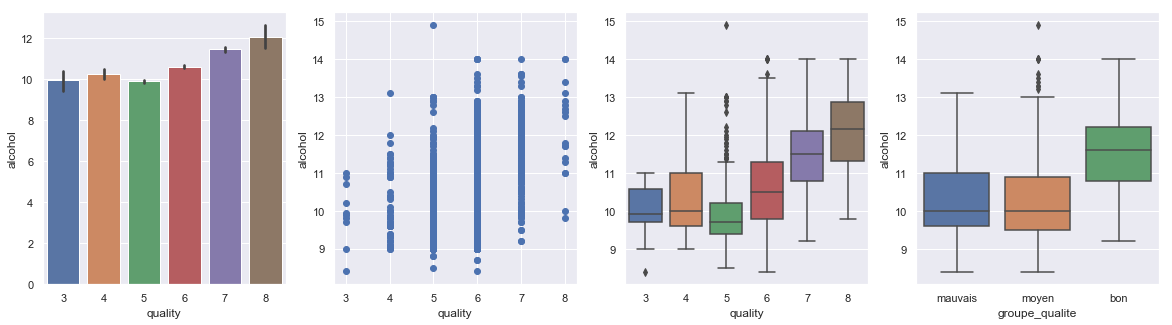

In [22]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.barplot(x='quality',y='alcohol',data=VinRouge)
plt.subplot(1,4,2)
plt.scatter(x=VinRouge.quality,y=VinRouge.alcohol)
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.subplot(1,4,3)
sns.boxplot(x='quality',y='alcohol',data=VinRouge)
plt.subplot(1,4,4)
sns.boxplot(x='groupe_qualite',y='alcohol',data=VinRouge)

# Chaque boîte à moustaches ci-dessous décrit la distribution du taux d'alcool pour une note de qualité de vin donnée. 
# Nous pouvons clairement observer que la distribution en volume de vin a une tendance à la hausse basée sur des échantillons de vin de qualité supérieure.

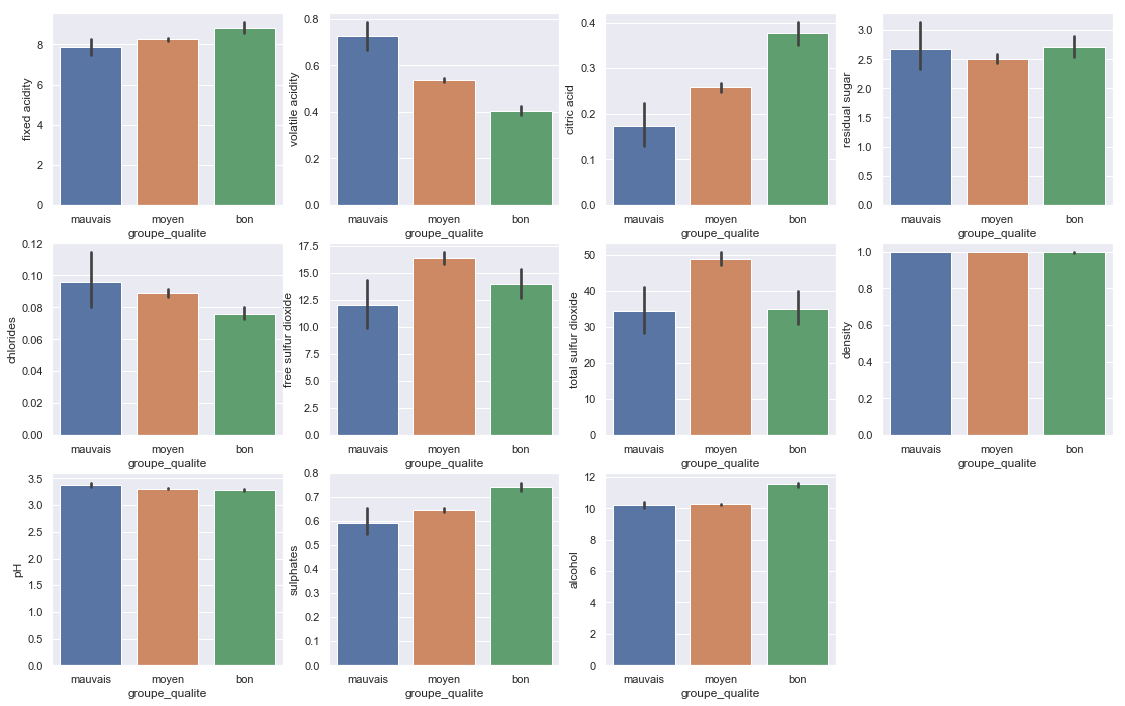

In [34]:
# Visualisation avec les groupes de qualité de vin rouge
plt.figure(figsize=(19,12))
plt.subplot(4,3,1)
j=1
for i in VinRouge.columns:
    if j < 12:
        plt.subplot(3,4,j)
        sns.barplot(x='groupe_qualite',y=i,data=VinRouge)
        j+=1


# Machine Learning

## Importation des librairies

In [44]:
from sklearn import preprocessing
from sklearn import neighbors, datasets
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

## Entraînement et application du KNN

In [46]:
scaler = preprocessing.MinMaxScaler()


# VinRouge_KNN = VinRouge[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
VinRouge_KNN = VinRouge.iloc[:,0:11]
VinRouge_KNN.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [59]:
# entraînement et ajustement du jeu de données en KNN

VinRouge_KNN = scaler.fit_transform(VinRouge.iloc[:,:11])

X, y = VinRouge_KNN, VinRouge['quality']

knn = neighbors.KNeighborsClassifier(n_neighbors=3) 


In [60]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

## Prévisions

In [61]:
prediction = knn.predict(X)
prediction

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

## Evaluation du modèle

In [62]:
knn.score(X,y)

0.7967479674796748

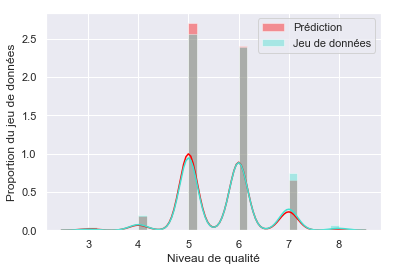

In [63]:
sns.distplot(prediction, color="red", label= "Prédiction")
sns.distplot(y, color="turquoise", label= "Jeu de données")

plt.ylabel("Proportion du jeu de données")
plt.xlabel("Niveau de qualité")

plt.rcParams['figure.figsize'] = [30, 20]
plt.legend()
plt.show()

# Représentation de la prédiction par rapport au jeu de données sur le vin rouge

## Entraînement et application du KMeans

In [67]:
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn import cluster
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [68]:
VinRouge_KMeans = VinRouge.iloc[:,:11]
VinRouge_KMeans.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [69]:
a = linkage(VinRouge_KMeans.iloc[:,:11])

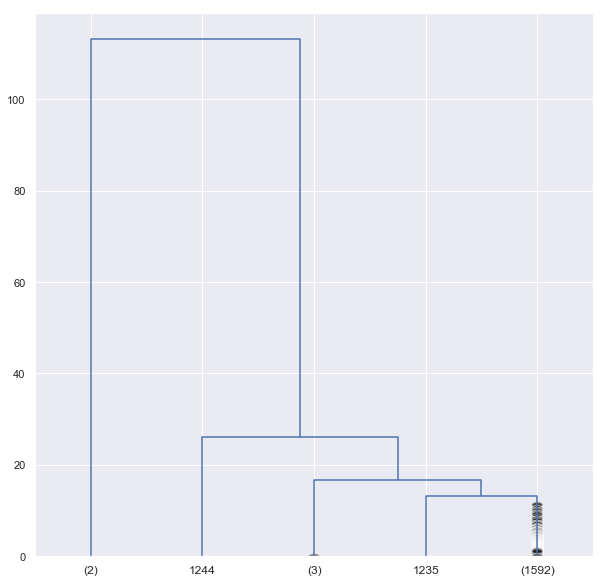

In [72]:
fig, axes = plt.subplots(figsize = (10,10))
dendro = dendrogram(a, truncate_mode = 'lastp', p = 5, color_threshold = 1.8, show_contracted = True)

In [73]:
VinRouge_KMeans = scale(VinRouge_KMeans)
VinRouge_KMeans

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [74]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(VinRouge_KMeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [77]:
kmeans_score = (metrics.silhouette_score(VinRouge_KMeans, kmeans.labels_))
kmeans_score

0.18938583423684668

In [86]:
def kmeans():
    a = 2
    b = 0
    while a < 14:
        kmeans = KMeans(n_clusters = a)
        kmeans.fit(VinRouge_KMeans)
        s_score = (metrics.silhouette_score(VinRouge_KMeans, kmeans.labels_))
        result_k.iloc[b,1] = s_score
        a += 1
        b += 1
    return result_k

In [87]:
result_k = pd.DataFrame()
result_k["cluster"] = [2,3,4,5,6,7,8,9,10,11,12,13]
result_k["score"] = 0

In [88]:
kmeans()

,cluster,score
0,2,0.213730
1,3,0.189419
2,4,0.171835
3,5,0.190270
4,6,0.194220
5,7,0.190498
6,8,0.151039
7,9,0.153855
8,10,0.147802
9,11,0.150268


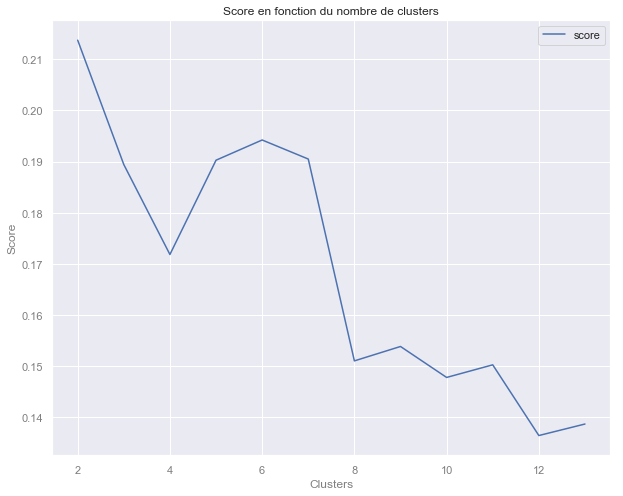

In [91]:
plt.figure(figsize=(10,8))
plt.plot(result_k['cluster'],result_k['score'])

plt.ylabel("Score", color='grey')
plt.xlabel("Clusters", color='grey')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.title("Score en fonction du nombre de clusters")
plt.locator_params(axis='x', nbins =12)
legend = plt.legend()
